In [29]:
import pandas as pd
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly.express as px

In [30]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(25,15)}
        )

In [1]:
#Для начала, давайте посмотрим на распределение посещений сайта по дням. 
    #Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика

In [31]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/dataset/step_1_lesson_7.csv')

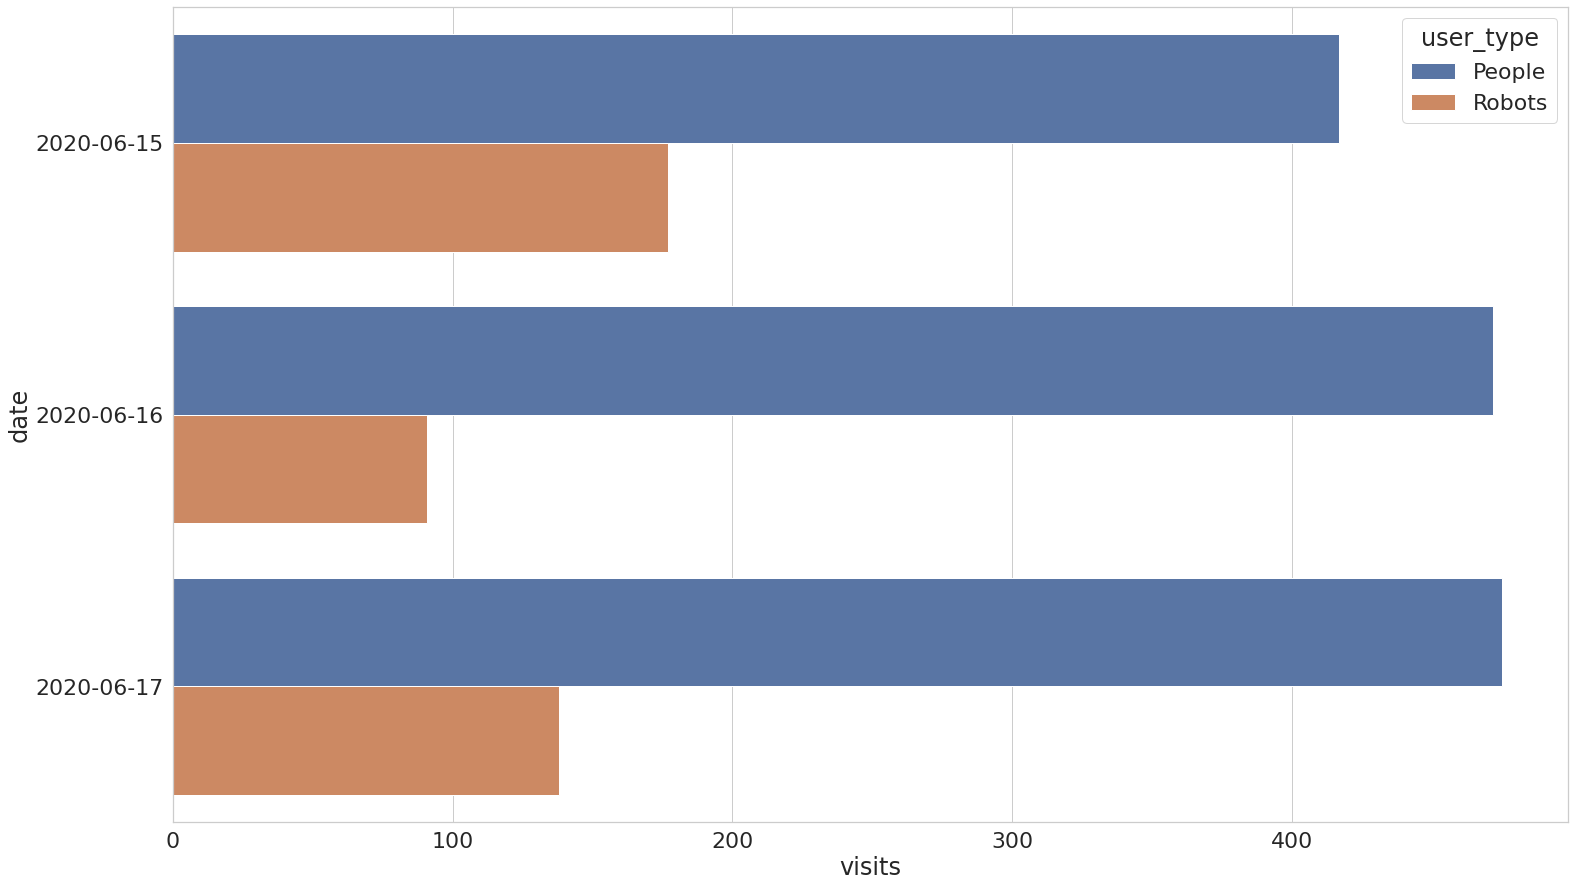

In [36]:
sns.barplot(data=df, x="visits", y="date", hue="user_type")

In [37]:
#Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

In [41]:
df_yandex = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/dataset/Lesson_7_min_data/step_2_lesson_7.csv')

In [55]:
per = df_yandex.visits / df_yandex.visits.sum() * 100

In [56]:
per.round()

0     60.0
1     10.0
2      9.0
3      7.0
4      5.0
5      3.0
6      3.0
7      2.0
8      1.0
9      1.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
Name: visits, dtype: float64

In [ ]:
#Давайте выясним, с какого браузера приходит больше всего ботов

In [57]:
df_3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/dataset/Lesson_7_min_data/step_3_lesson_7.csv')

In [86]:
new_df = df_3.groupby(['browser'], as_index = False) \
    .agg({'visits' : 'sum'}) \
    .rename(columns={'visits' : 'total_visits'})

In [88]:
total_df = df_3.merge(new_df, how='left', on='browser')

In [93]:
percent = total_df.visits / total_df.total_visits * 100

In [98]:
#Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.
    #В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

In [99]:
df_4 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/dataset/Lesson_7_min_data/step_4_lesson_7.csv')

In [101]:
df_4.visits.sum()

594.0

In [108]:
df_4['share'] = (df_4.visits / 594.0 * 100).round(1)

In [123]:
df_4.to_csv('for_google', index = False)

In [124]:
#При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet

In [140]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

scope = ['https://www.googleapis.com/auth/spreadsheets',
         "https://www.googleapis.com/auth/drive"]

credentials = ServiceAccountCredentials.from_json_keyfile_name('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/dataset/Lesson_7_min_data/gs_credentials.json.json', scope)
client = gspread.authorize(credentials)

In [141]:
sheet = client.create("NewDatabase")

In [142]:
sheet.share('zetpetneru@gmail.com', perm_type='user', role='writer')

In [143]:
sheet = client.open("NewDatabase").sheet1

In [144]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/mini_projects/for_google')

In [145]:
sheet.update([df.columns.values.tolist()] + df.values.tolist())

{'spreadsheetId': '1HcX9nA0Rdp098K82IjwuRpKHYLv3qg_8h_08V-61Tss',
 'updatedRange': 'Sheet1!A1:E25',
 'updatedRows': 25,
 'updatedColumns': 5,
 'updatedCells': 125}

In [ ]:
#Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика
    #и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

In [147]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

last = pd.read_csv(BytesIO(data))

In [165]:
uniq = df_4.merge(last, how='inner', on=['date', 'browser', 'user_type'])

In [174]:
uniq['visits_users'] = (uniq.visits / uniq.users).round()

In [172]:
uniq.query('browser == "Google Chrome" & user_type == "Robots"')

,date,browser,user_type,visits,share,users,visits_users
1,2020-06-15,Google Chrome,Robots,104.0,17.5,104.0,100.0
